# Binary Classification of Breast Cancer into Benign and Malignant
## Followed by Visualization

In [5]:
## Loading and observing data

wbcd_df <- read.csv("../input/breast-cancer-wisconsin-data/data.csv")
head(wbcd_df)
dim(wbcd_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


[1] 569  33

**Taking care of columns with null/missing values**

In [6]:
## Function to print the columns with null values

CheckColAllNulls <- if (ncol(Filter(function(x) any(is.na(x)), wbcd_df)) > 0) {
    cat("columns have nulls:",ncol(Filter( function(x) any(is.na(x)), wbcd_df)))
    cat("\n\n")
    cat("columns names that have nulls:",colnames(Filter( function(x) any(is.na(x)), wbcd_df)))
    cat("\n\n")
#     df <- Filter(function(x) ! any(is.na(x)), df)
#      print("columns having any nulls are removed")
} else {
    print("No columns having any nulls are found")
}

columns have nulls: 1

columns names that have nulls: X



In [7]:
## Thus no non-null value present -- we can safely drop this column

table(wbcd_df$X)

< table of extent 0 >

In [8]:
## Removing the column X

wbcd_df <- Filter(function(x) ! any(is.na(x)), wbcd_df)
dim(wbcd_df)

[1] 569  32

**Encoding categorical label variable**

In [9]:
## if diagnosis column is M meaning Malignant then 1 else 0 for B or Benign

wbcd_df$diagnosis <- (ifelse(wbcd_df$diagnosis=='B', 0, 1))
table(wbcd_df$diagnosis)


  0   1 
357 212 

In [10]:
wbcd_df$Label_Diagnosis <- factor(ifelse(wbcd_df$diagnosis==1, 1, 0))

**Summary of the cleaned data**

In [96]:
#summary(wbcd_df)

In [11]:
str(wbcd_df)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.7

In [99]:
head(wbcd_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,Label_Diagnosis
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
2,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
3,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
4,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
5,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
6,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


## Correlation between Variables

In [12]:
library("Hmisc")

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}


corr_res <- rcorr(as.matrix(wbcd_df[,c(2:11)]))
flattenCorrMatrix(corr_res$r, corr_res$P)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




row,column,cor,p
<fct>,<fct>,<dbl>,<dbl>
diagnosis,radius_mean,0.73002851,0.000000e+00
diagnosis,texture_mean,0.41518530,0.000000e+00
radius_mean,texture_mean,0.32378189,2.220446e-15
diagnosis,perimeter_mean,0.74263553,0.000000e+00
radius_mean,perimeter_mean,0.99785528,0.000000e+00
texture_mean,perimeter_mean,0.32953306,6.661338e-16
diagnosis,area_mean,0.70898384,0.000000e+00
radius_mean,area_mean,0.98735717,0.000000e+00
texture_mean,area_mean,0.32108570,3.996803e-15


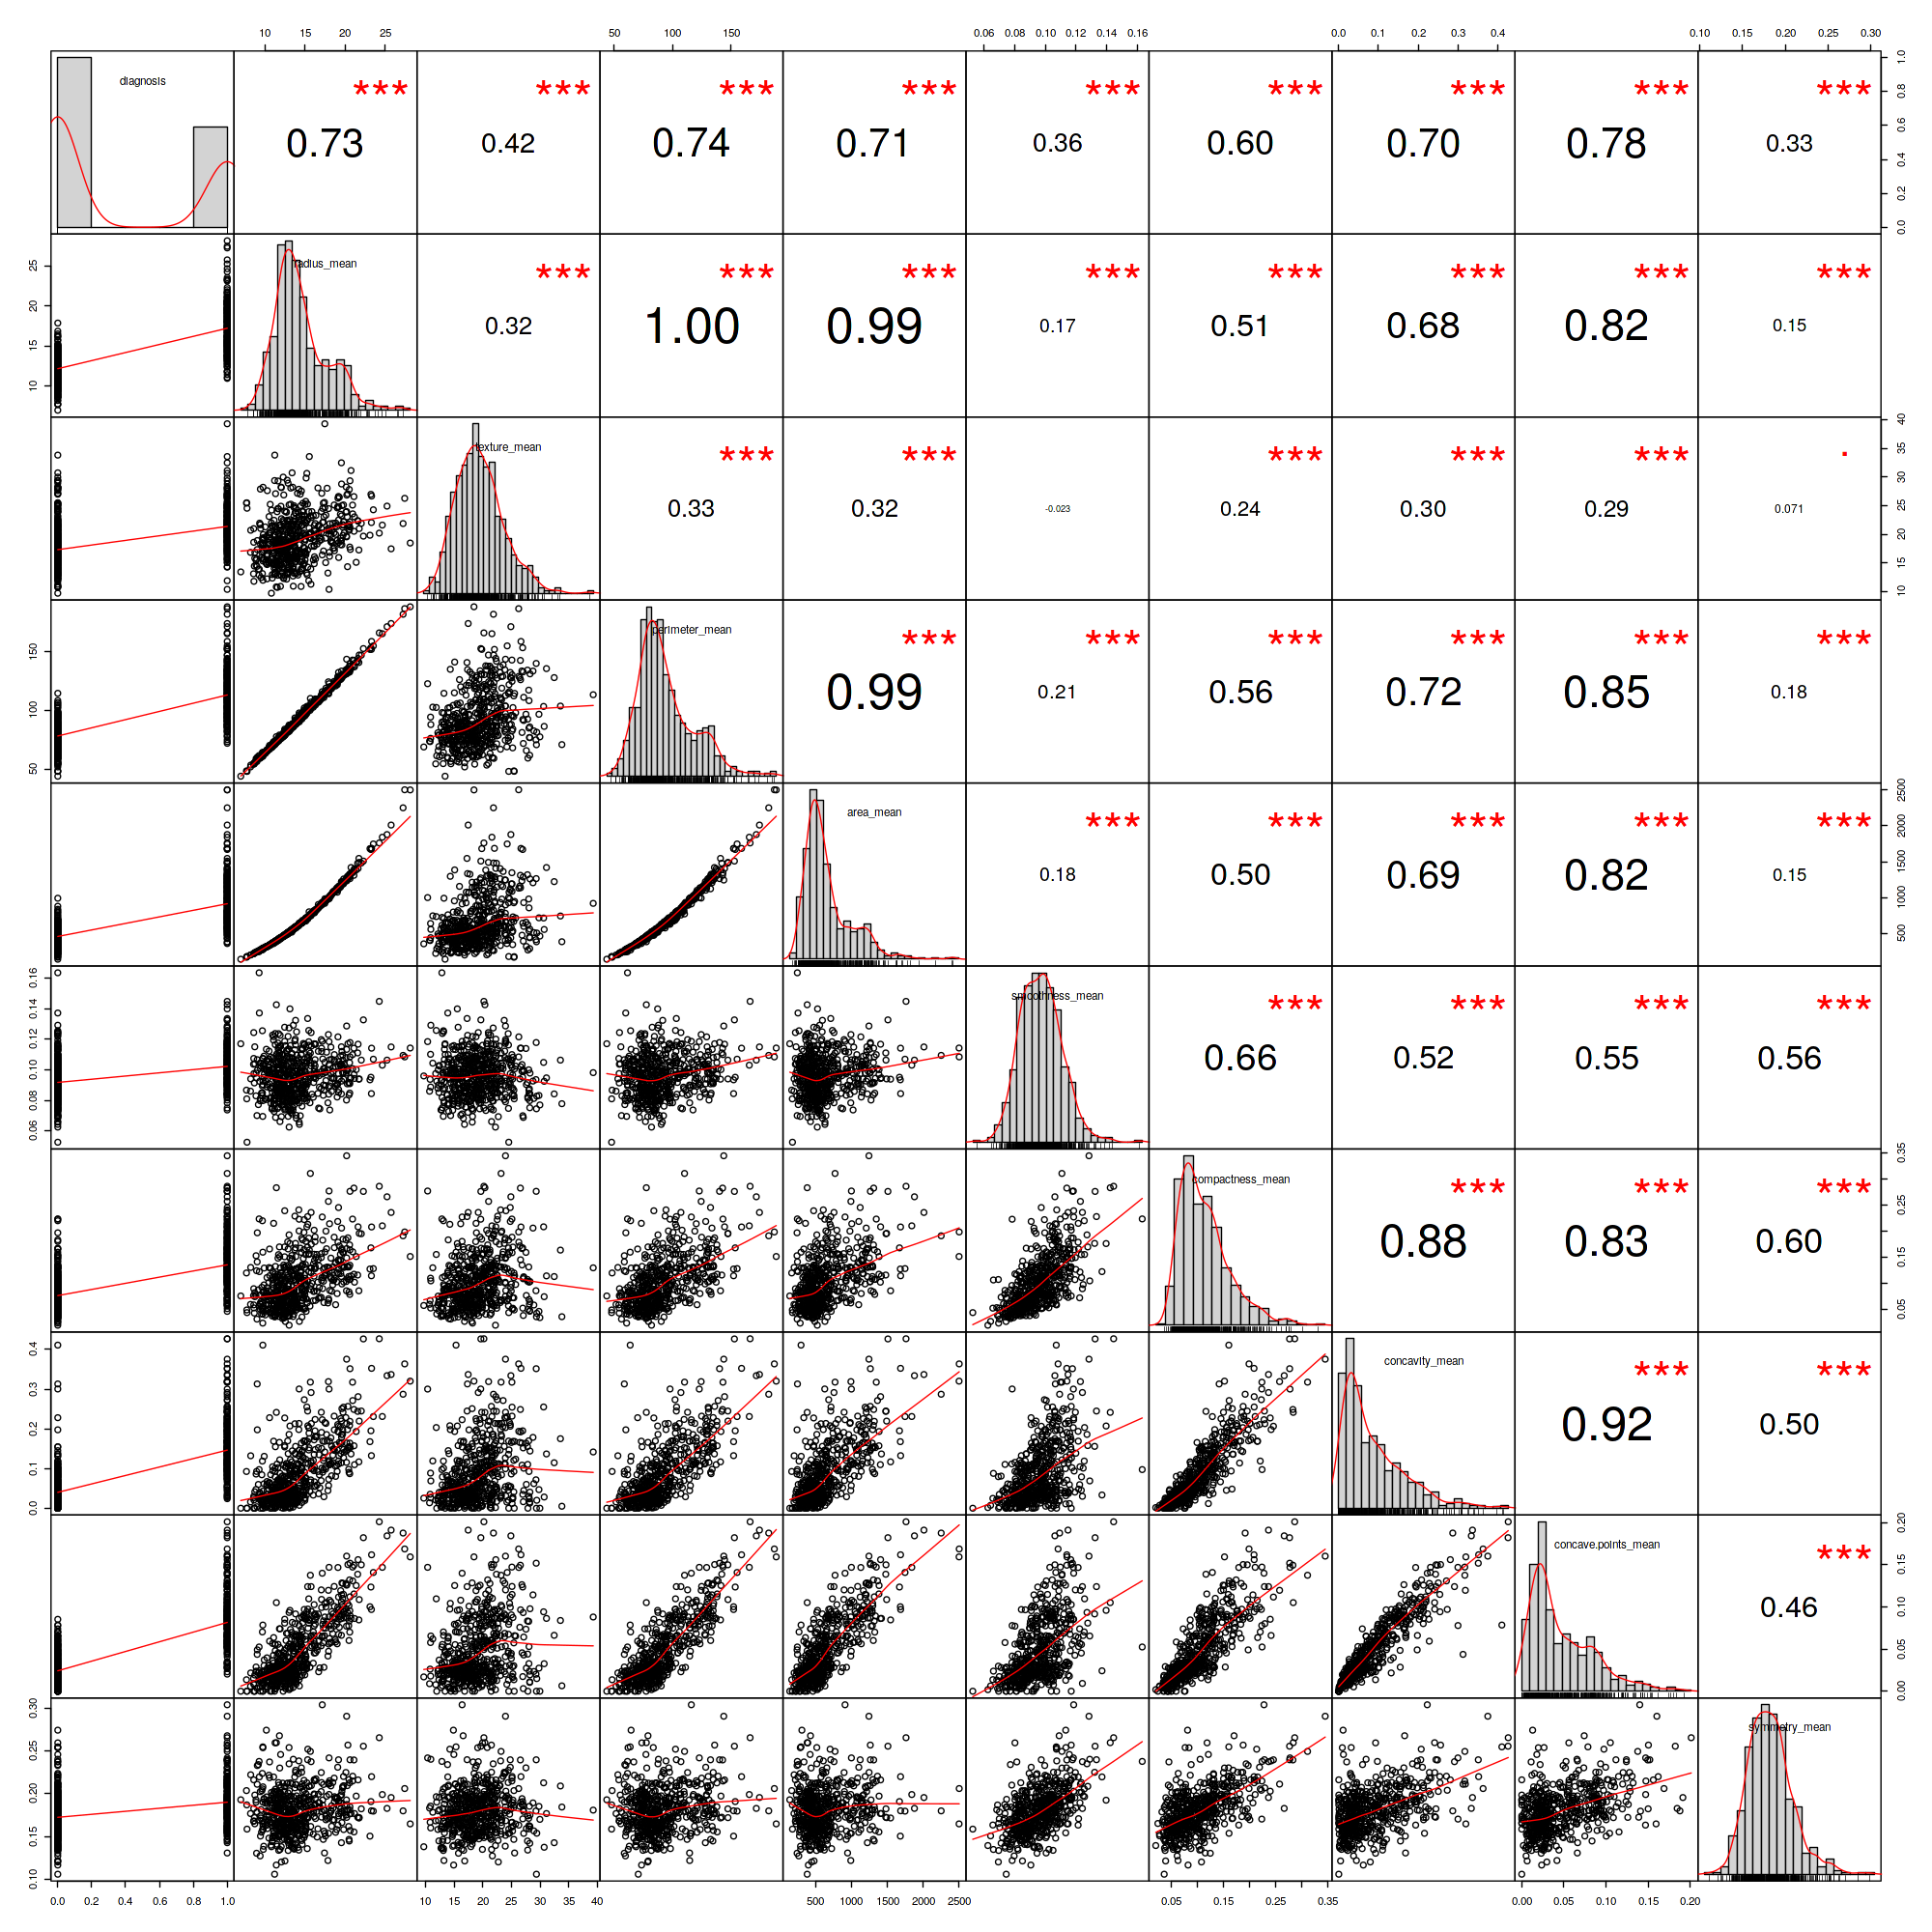

In [43]:
library(PerformanceAnalytics)
# showing histogram
# color grey
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)
chart.Correlation(wbcd_df[,c(2:11)],histogram=TRUE, 
                  col="grey10", 
                  pch=1, 
                  cex.cor.scale=2, 
                  main="Cancer Correlation Plot", 
                  cex.labels=20)

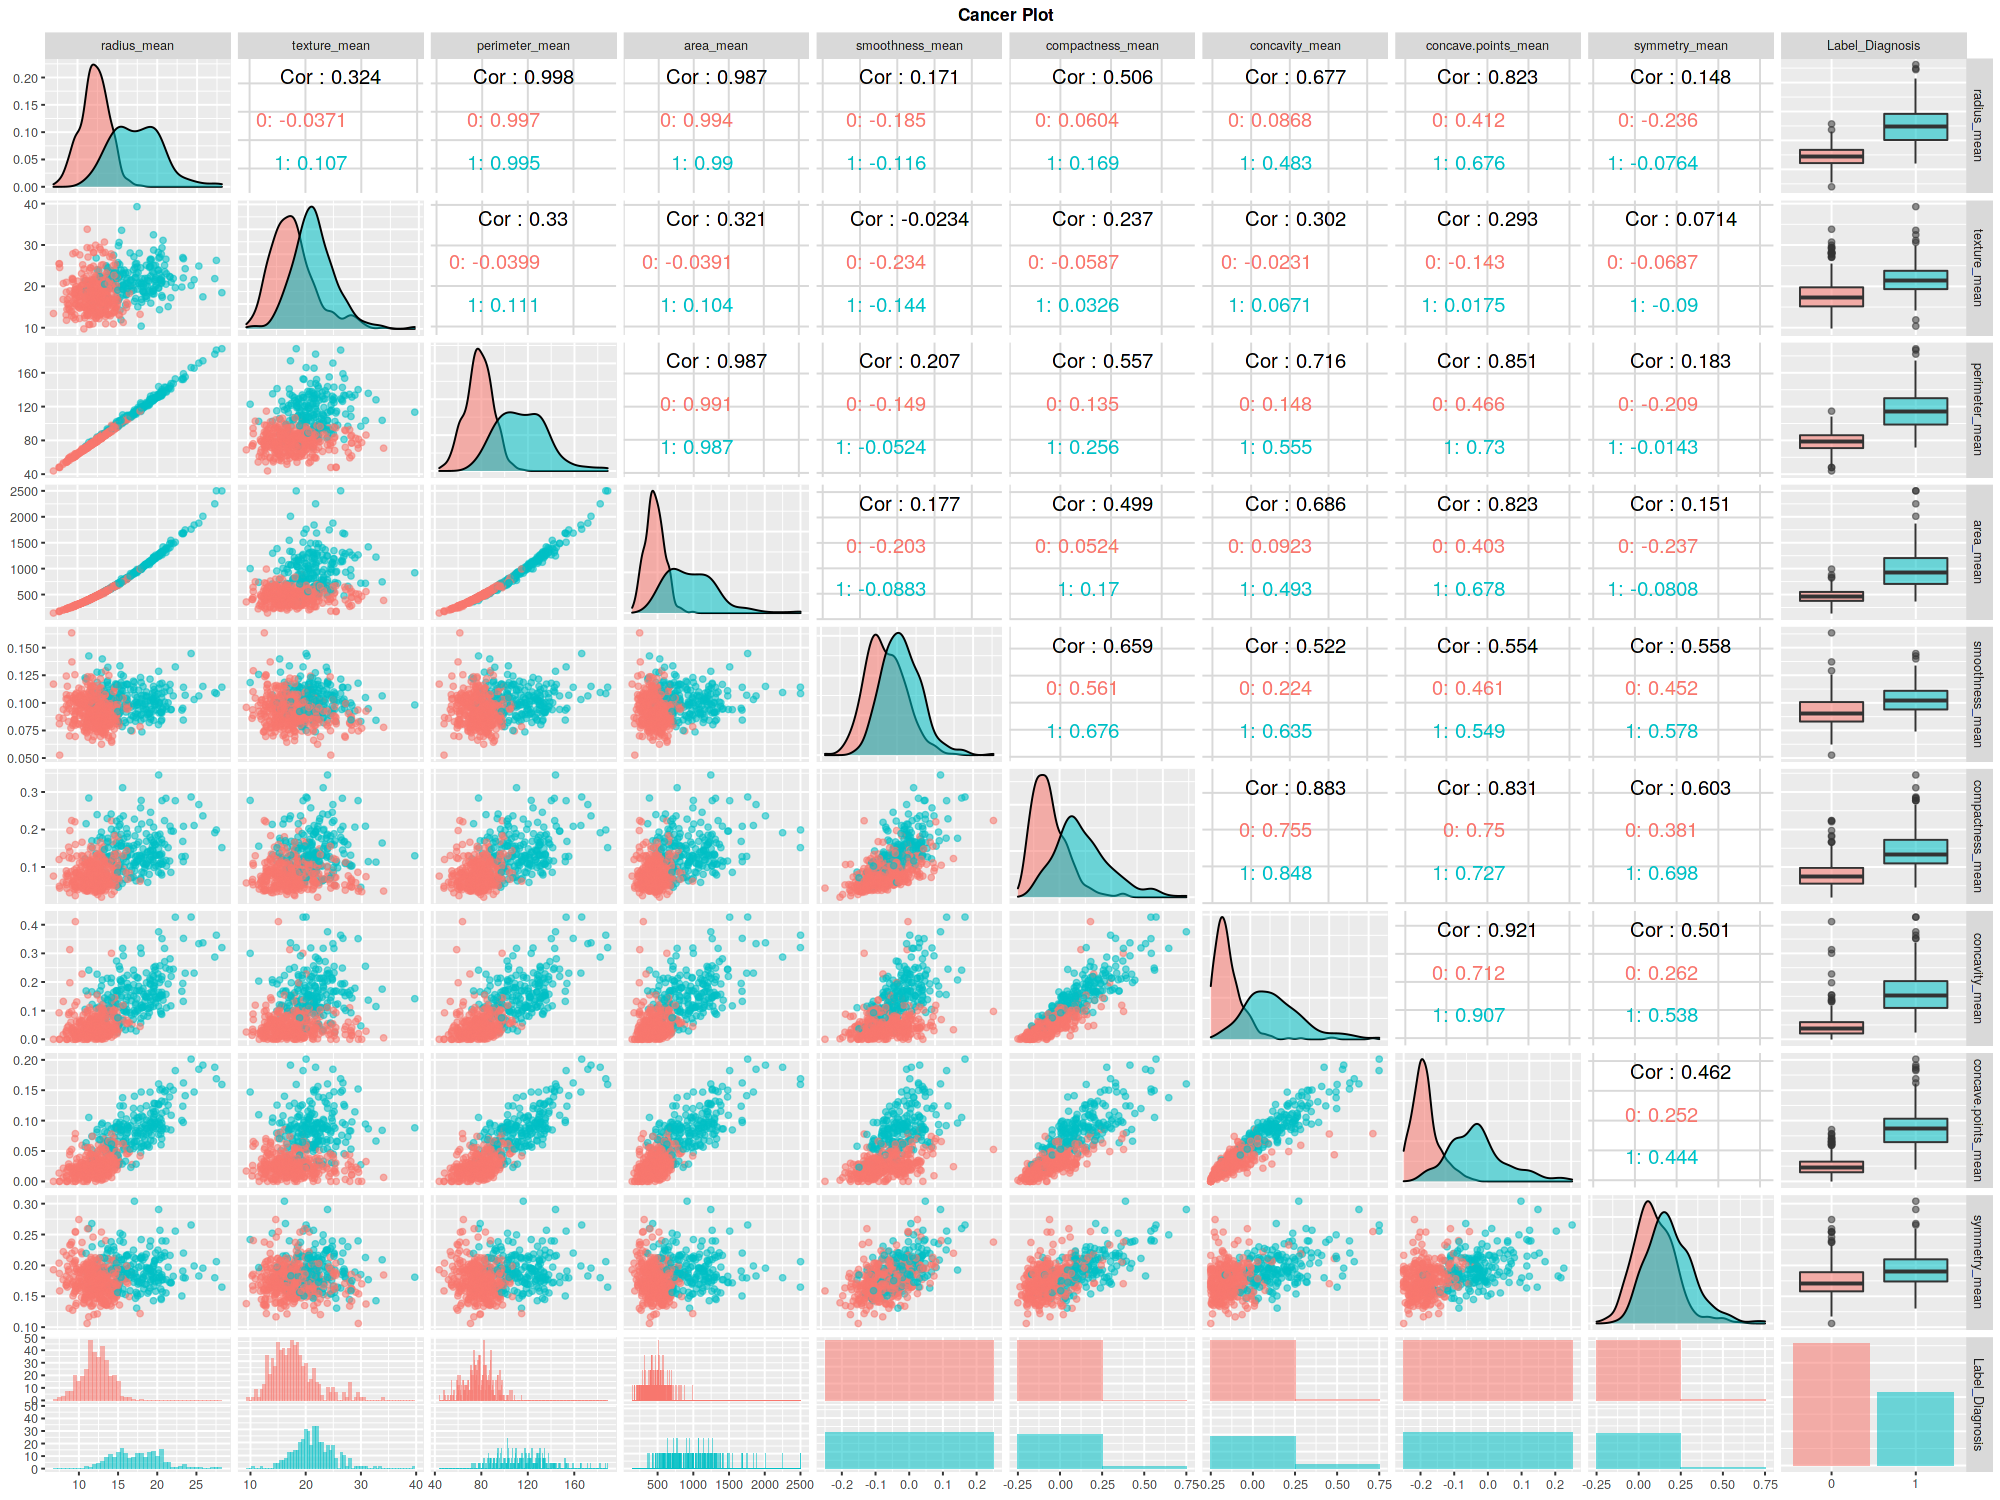

In [44]:
library(ggplot2)
library(GGally)
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)

# The correlation plots should have 2 distributions of seperate colors according to out Label Diagnosis
# alpha is basically the opacity
ggpairs(wbcd_df[,c(3:11, 33)], 
        aes(color=Label_Diagnosis, alpha=0.7), 
        lower=list(combo=wrap("facethist",  binwidth=0.5)), 
        upper = list(continuous = wrap("cor", size=5))) + 
labs(title="Cancer Plot")+
theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

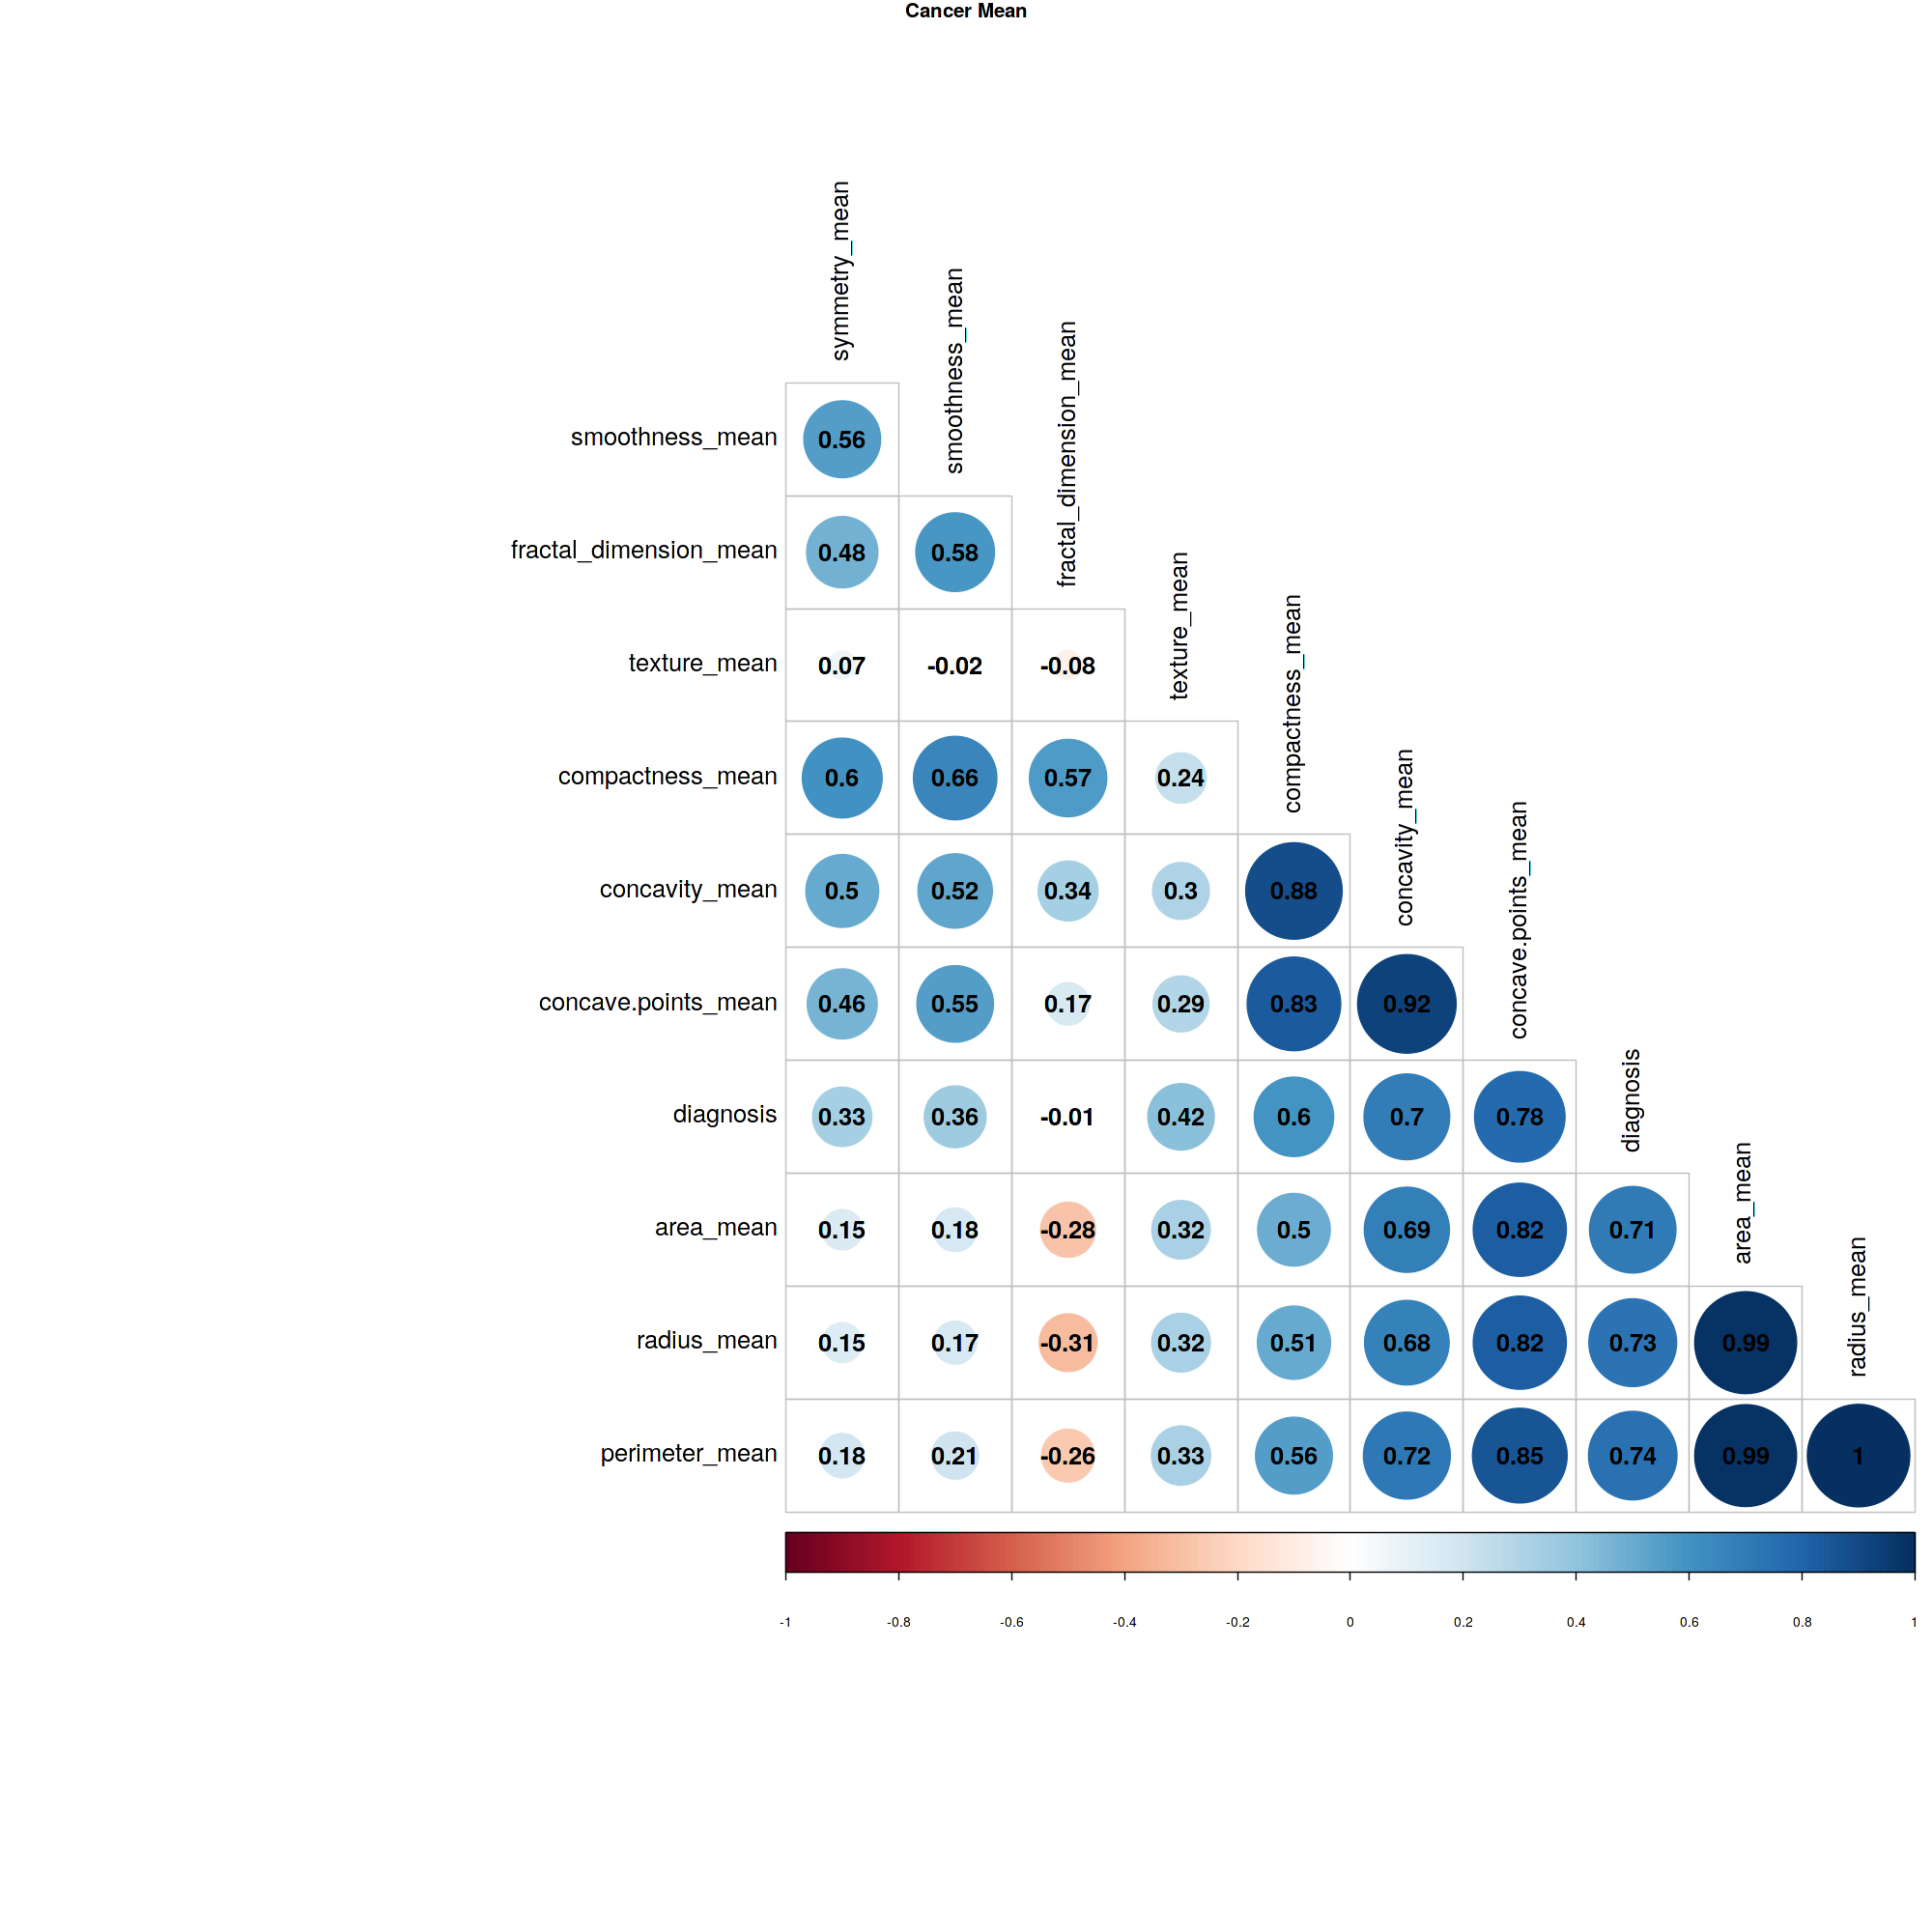

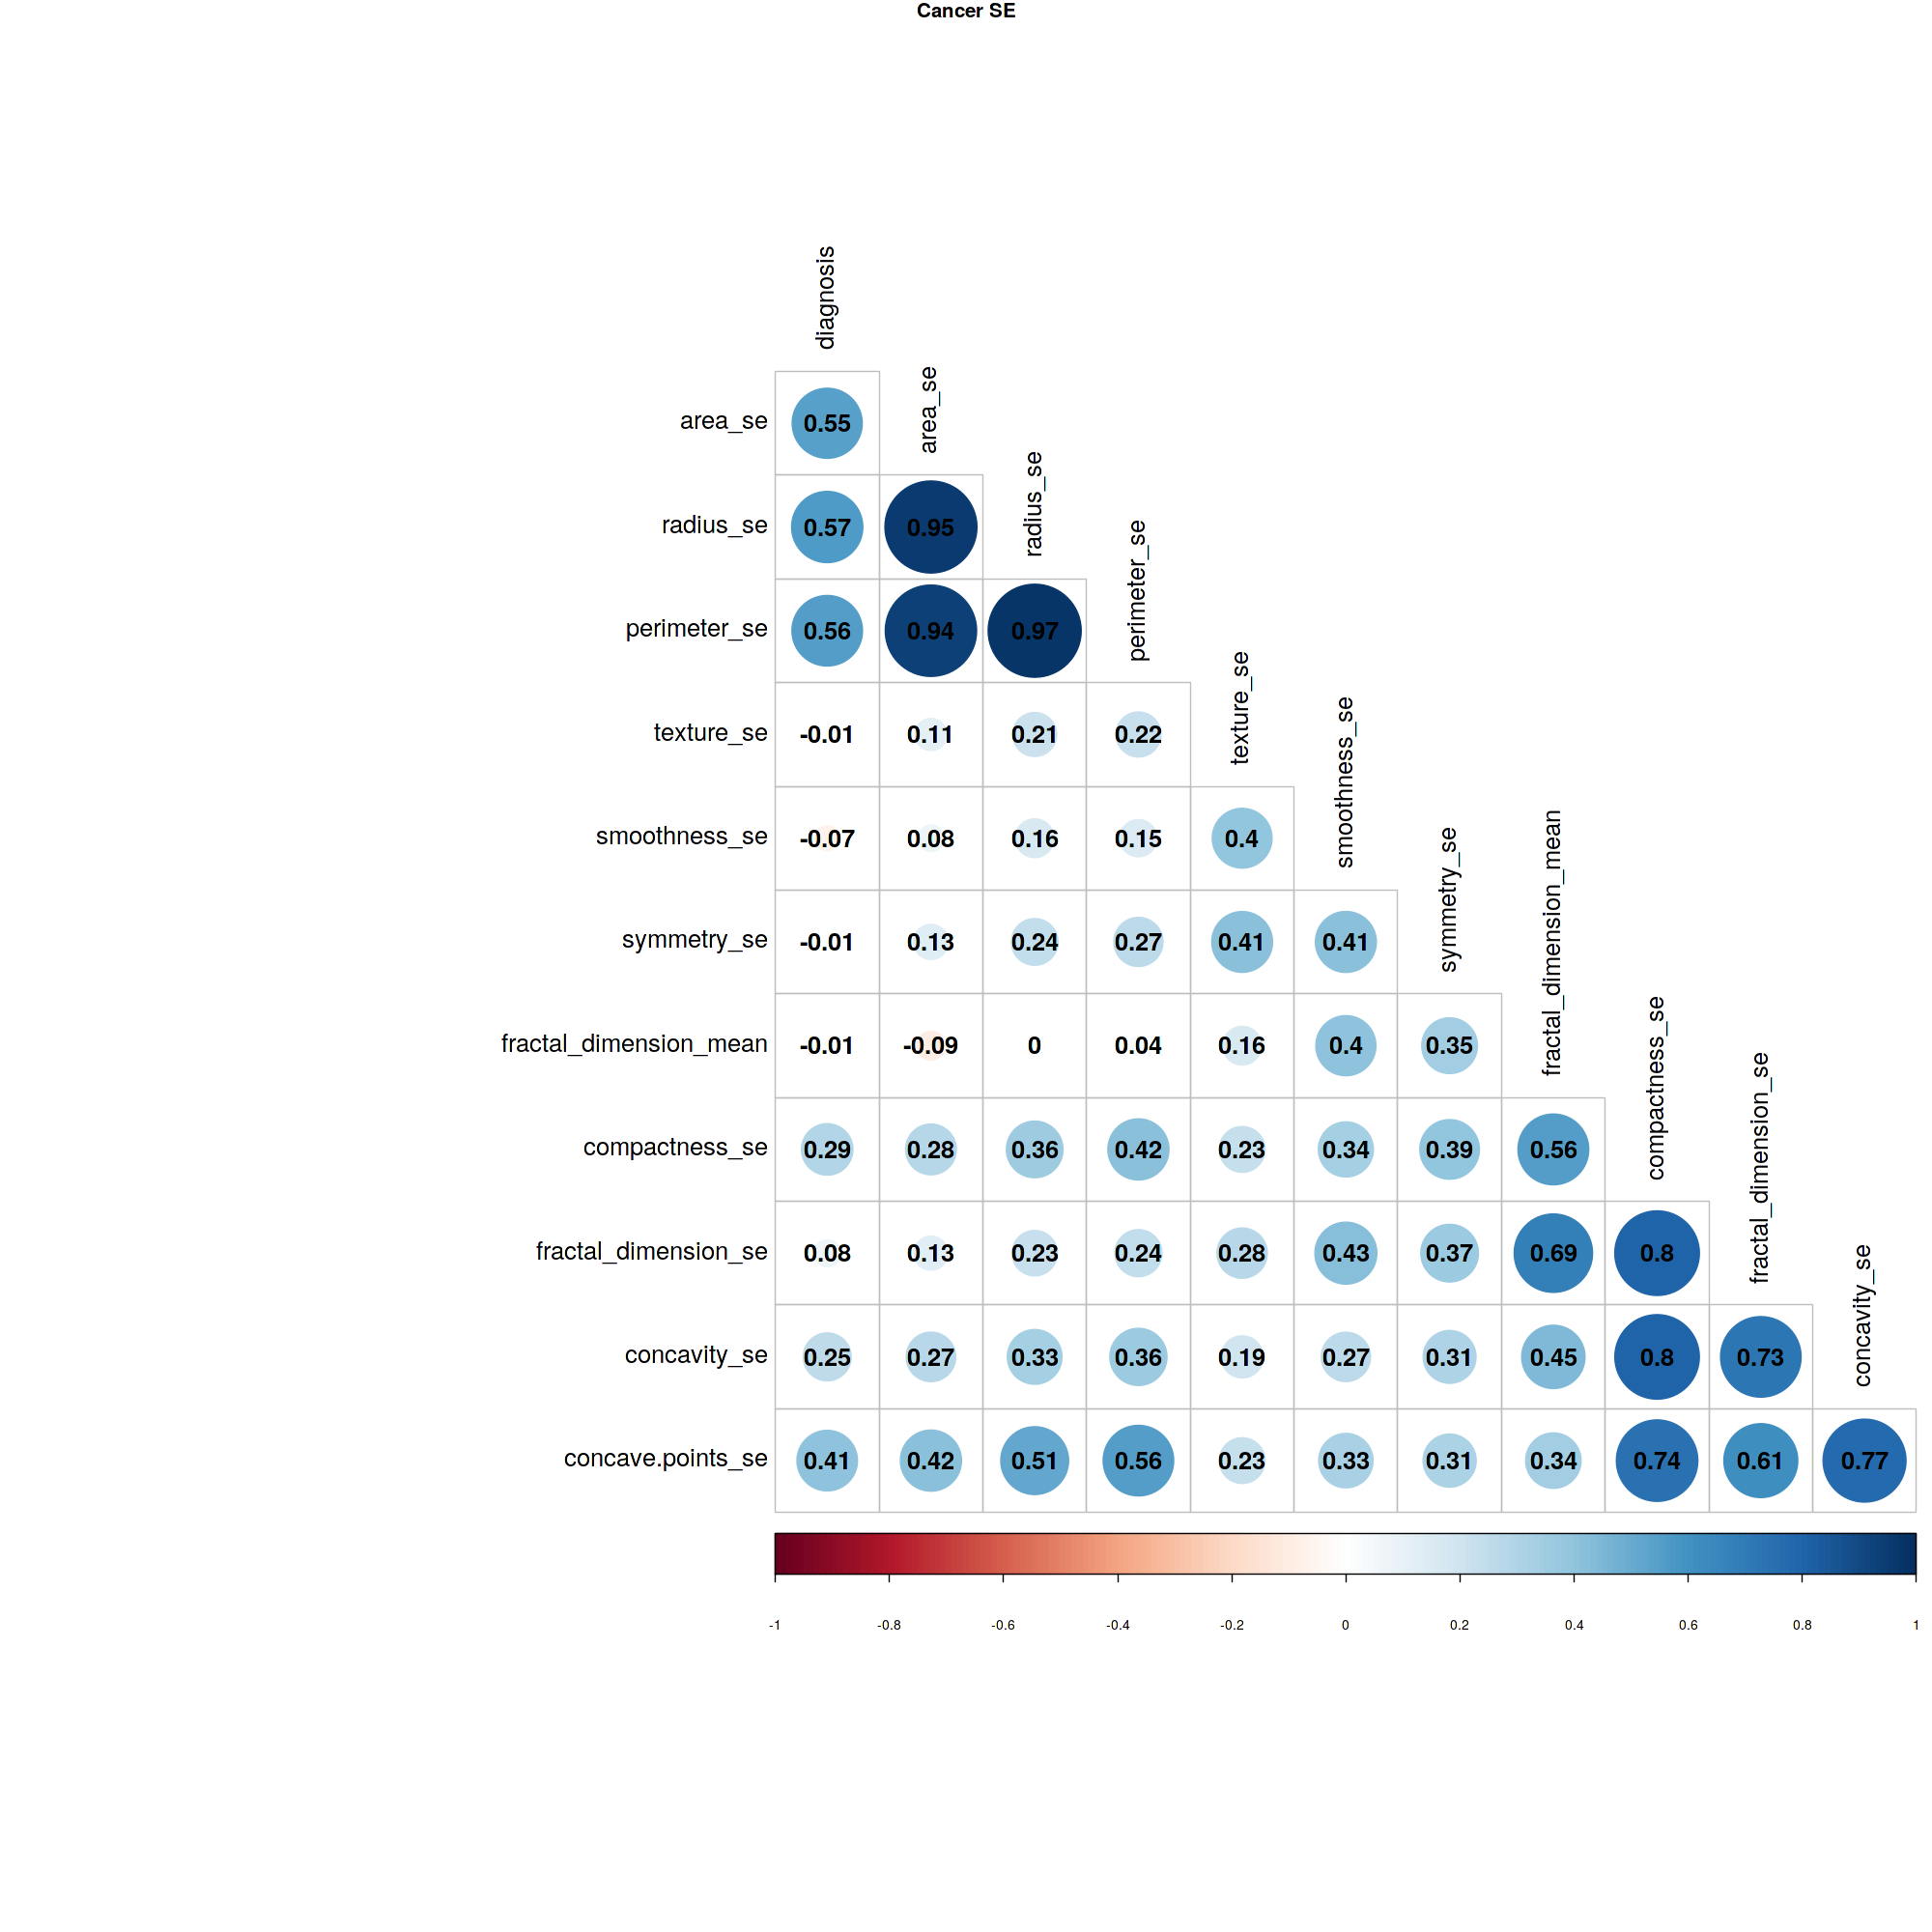

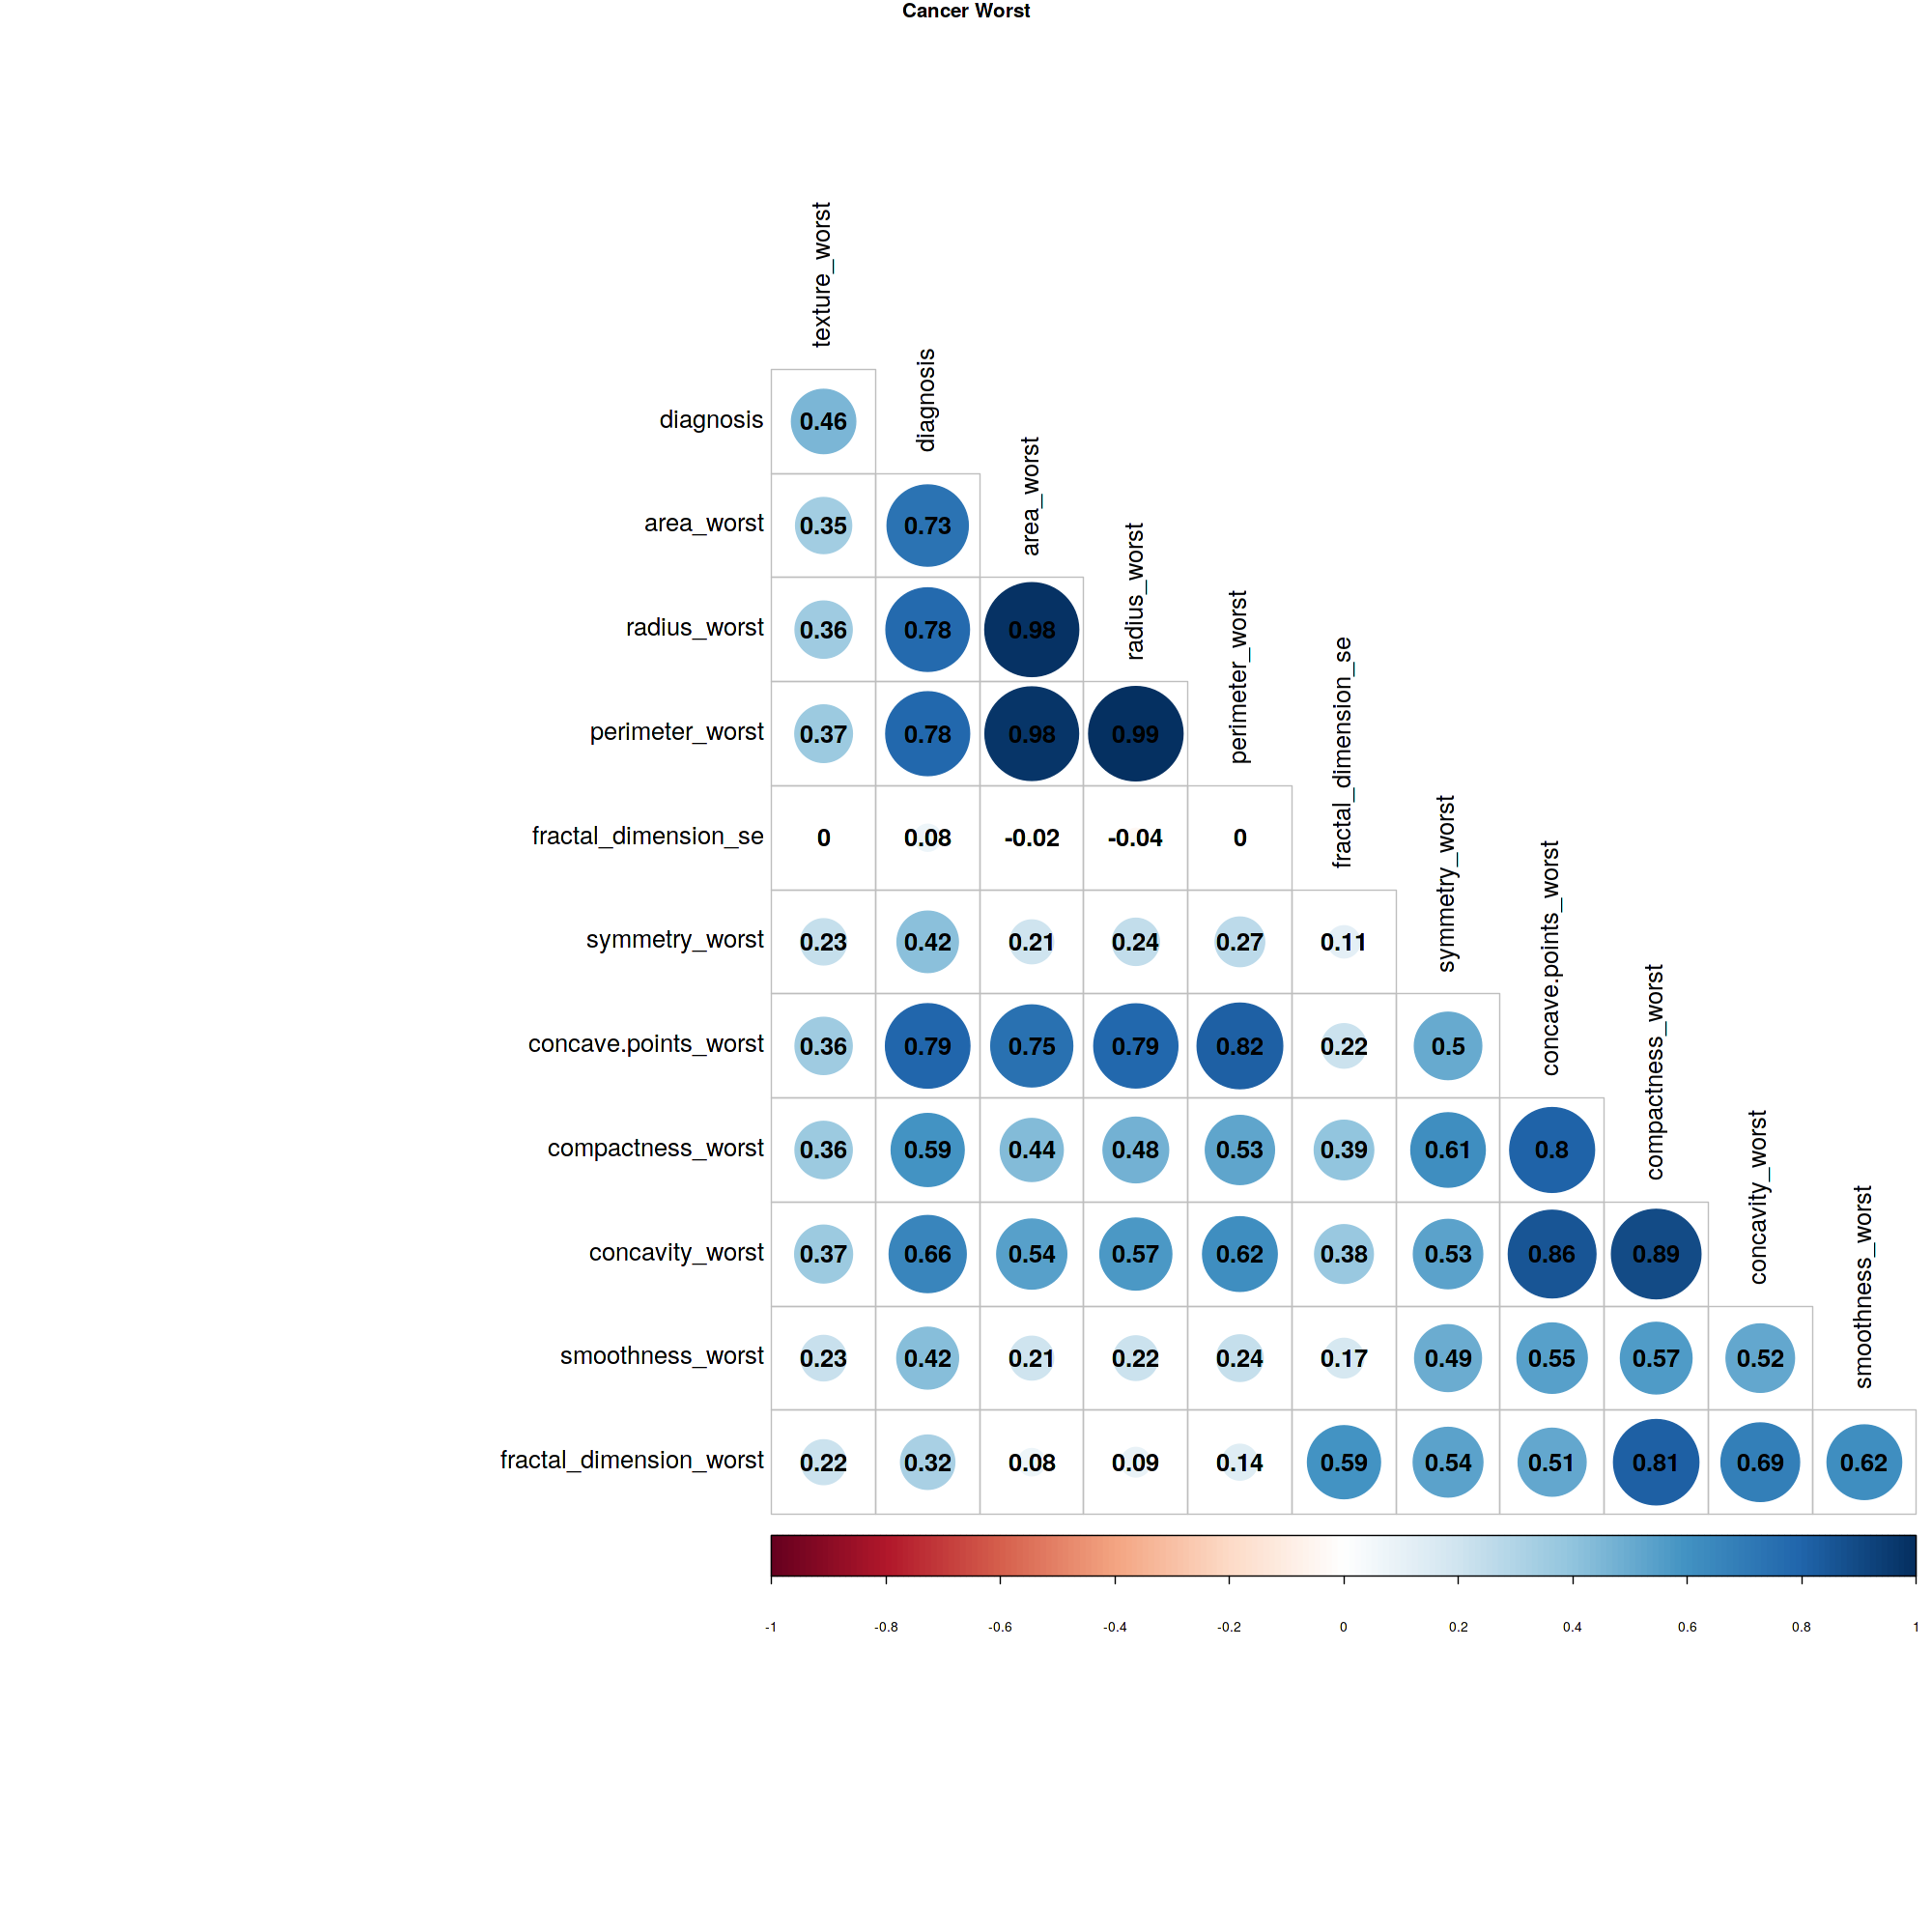

In [45]:
library(corrplot)
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

corrplot(cor(wbcd_df[,c(2:12)]), 
         type="lower", 
         order="hclust", 
         tl.col="black", 
         addCoef.col="black",
         number.cex=1.5,
         tl.cex=1.5,
         title="Cancer Mean",
         # hide correlation on principal diagnol
         diag=FALSE,
         mar=c(0,0,1,0))

corrplot(cor(wbcd_df[,c(12:22, 2)]), 
         type="lower", 
         order="hclust", 
         tl.col="black", 
         addCoef.col="black",
         number.cex=1.5,
         tl.cex=1.5,
         title="Cancer SE",
         # hide correlation on principal diagnol
         diag=FALSE,
         mar=c(0,0,1,0))

corrplot(cor(wbcd_df[,c(22:32, 2)]), 
         type="lower", 
         order="hclust", 
         tl.col="black", 
         addCoef.col="black",
         number.cex=1.5,
         tl.cex=1.5,
         title="Cancer Worst",
         # hide correlation on principal diagnol
         diag=FALSE,
         mar=c(0,0,1,0))

### Summary: The following variables have high correlation with Diagnosis (corr coef >0.6):
1. concavity_mean/concave.points_mean
2. area_mean/radius_mean/perimeter_mean
3. area_worst/radius_worst/perimeter_worst
4. concavity_worst/concave.points_worst

**Thus 2 main factors affect the diagnosis: concavity and radius**